<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B41_E22CSEU1213_Kanishka/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

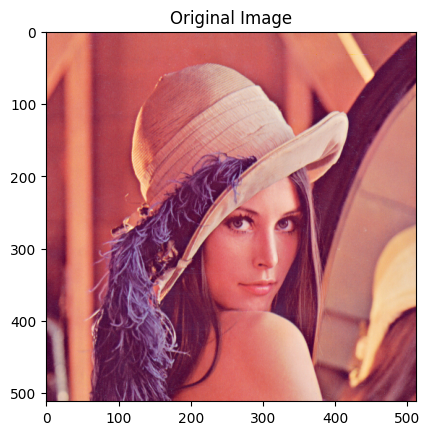

Image Size (Height, Width, Channels): (512, 512, 3)
Total Pixels: 262144


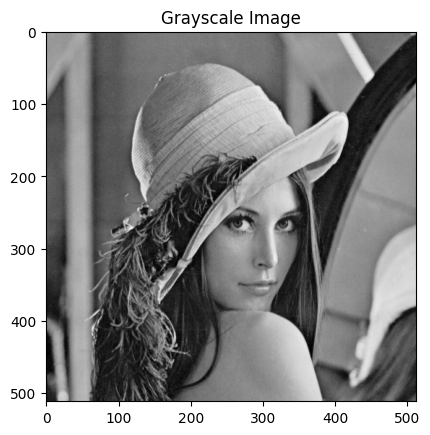

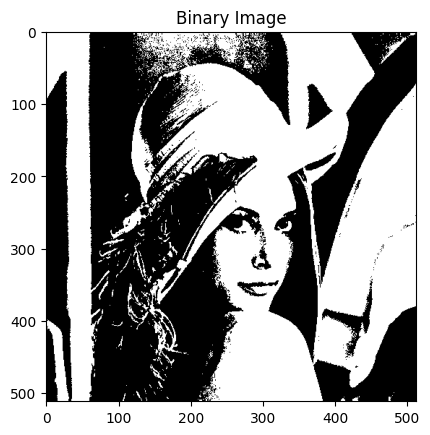

Black Pixel Count: 130547


In [3]:
image_path = "Lena_Image.png"
img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

img_size = img.shape
print(f"Image Size (Height, Width, Channels): {img_size}")

total_pixels = img_size[0] * img_size[1]
print(f"Total Pixels: {total_pixels}")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_img)
plt.imshow(gray_img, cmap="gray")
plt.title("Grayscale Image")
plt.show()

threshold = 128
_, binary_img = cv2.threshold(gray_img, threshold, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_img)
plt.imshow(binary_img, cmap="gray")
plt.title("Binary Image")
plt.show()

black_pixel_count = np.sum(binary_img == 0)
print(f"Black Pixel Count: {black_pixel_count}")

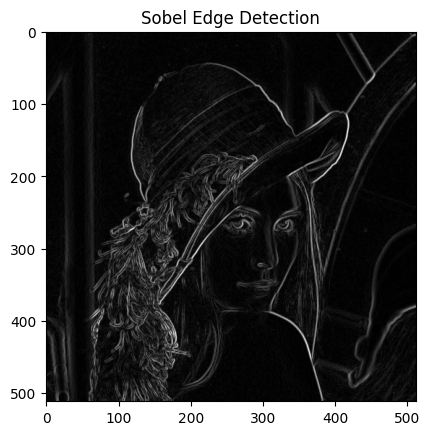

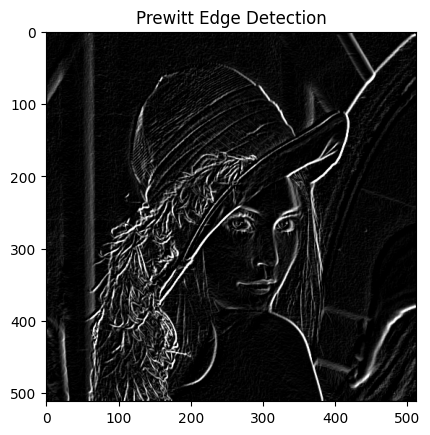

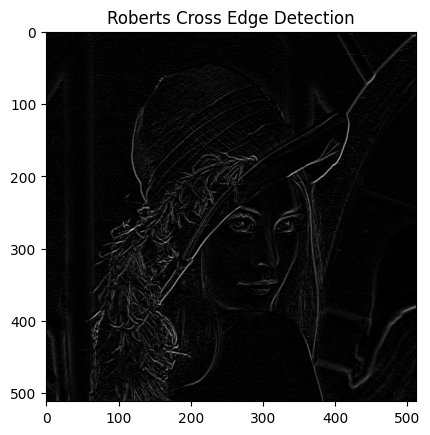

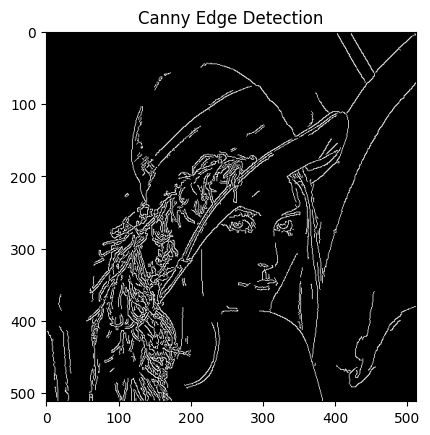

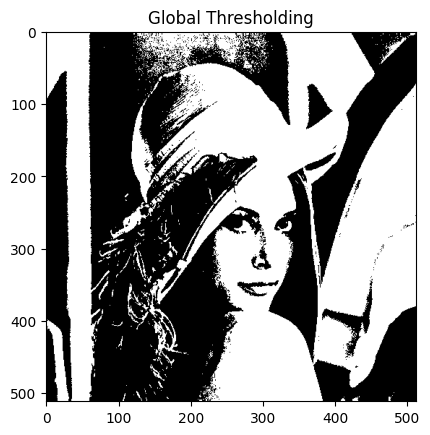

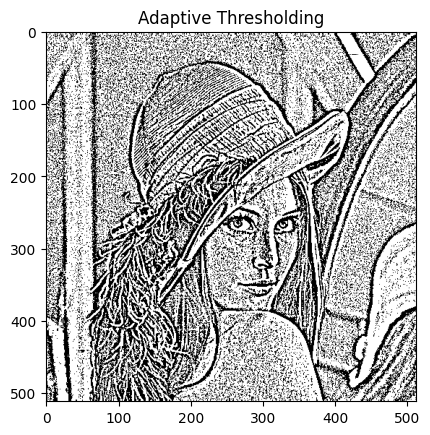

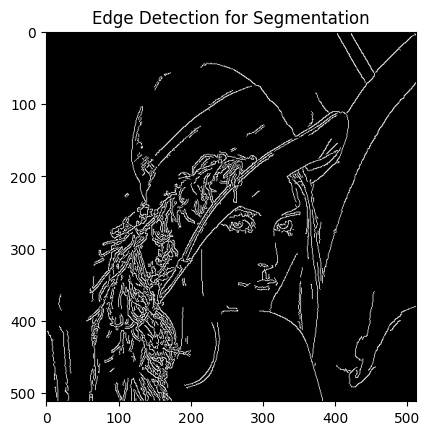

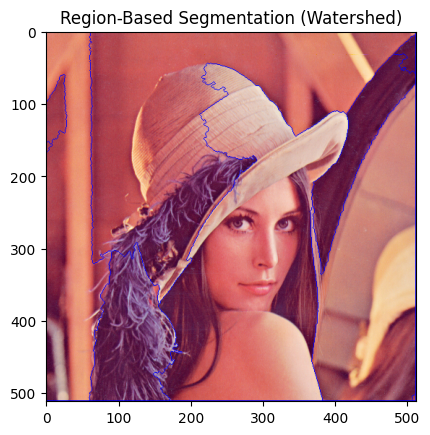

In [4]:
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_edge, cmap="gray")
plt.title("Sobel Edge Detection")
plt.show()

kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray_img, -1, kernelx)
prewitt_y = cv2.filter2D(gray_img, -1, kernely)
prewitt_edge = cv2.add(prewitt_x, prewitt_y)
plt.imshow(prewitt_edge, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.show()

roberts_kernelx = np.array([[1, 0], [0, -1]])
roberts_kernely = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_img, -1, roberts_kernelx)
roberts_y = cv2.filter2D(gray_img, -1, roberts_kernely)
roberts_edge = cv2.add(roberts_x, roberts_y)
plt.imshow(roberts_edge, cmap="gray")
plt.title("Roberts Cross Edge Detection")
plt.show()

canny_edges = cv2.Canny(gray_img, 100, 200)
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.show()

_, global_thresh = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap="gray")
plt.title("Global Thresholding")
plt.show()

adaptive_thresh = cv2.adaptiveThreshold(
    gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Adaptive Thresholding")
plt.show()

plt.imshow(canny_edges, cmap="gray")
plt.title("Edge Detection for Segmentation")
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
markers = np.uint8(markers)
markers = cv2.connectedComponents(markers)[1]

markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Region-Based Segmentation (Watershed)")
plt.show()